In [1]:
import numpy as np

In [2]:
DEBUG = False

def debug_print(*args):
    if DEBUG:
        string = ''
        for arg in args:
            strarg = arg
            if type(arg) != type(''):
                strarg = str(arg)
            string += ' ' + strarg + ' '
        print(string)

class Dense:
    def __init__(self, in_size, out_size, act_fwd, act_bwd):
        self.W = np.random.rand(out_size, in_size)*0.1
        self.b = np.random.rand(out_size)*0.1#np.random.rand(in_size)*0.01
        self.act_fwd = act_fwd
        self.act_bwd = act_bwd
        
    def prop_fwd(self, A):
        self.A = A
        debug_print('A', self.A)
        debug_print('W', d2.W)
        self.Z = np.dot(self.W, A)+self.b 
        debug_print('Z', self.Z)
        return self.act_fwd(self.Z)
    
    def prop_bwd(self, dA, Z):
        return self.act_bwd(dA, Z)
        

In [3]:
def relu(Z):
    return np.maximum(0,Z)

def relu_grad(dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0;
    return dZ

def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def sigmoid_grad(dA, Z):
    sig = sigmoid(Z)
    return np.convolve(dA, sig * (1 - sig), 'same')#dA * sig * (1 - sig)

def tanh(Z):
    t=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
    return t

def tanh_grad(dA, Z):
    t=tanh(Z)
    dt=1-t**2
    return dA * dt

def softmax(Z):
    eZ = np.exp(Z - np.max(Z))
    return eZ / eZ.sum(axis=0)

def softmax_grad(dA, Z):
    s = softmax(Z)
    s = Z.reshape(-1,1)
    jacobian = (np.diagflat(s) - np.dot(s, s.T))
    debug_print(dA.shape)
    debug_print(jacobian.shape)
    return np.matmul(dA, jacobian)

def binary_crossentropy_loss(Y_hat, Y): #binary cross entropy
    m = Y_hat.shape[0]
    cost = -1 / m * (np.dot(Y, np.log(Y_hat).T) + np.dot(1 - Y, np.log(1 - Y_hat).T))
    return np.squeeze(cost)
    
def binary_crossentropy_loss_grad(Y_hat, Y): #binary cross entropy
    eps = 1e-8
    return -(np.divide(Y, Y_hat+eps) - np.divide(1 - Y, 1 - Y_hat+eps))
    
def multi_cross_entropy(X,y):
    #TODO
    pass

def multi_cross_entropy_grad(X,y):
    #TODO
    pass

dA = np.array([[0.9, 0.1]])
y = np.array([0.1, 0.9])
#print(binary_crossentropy_loss_grad(y_hat, y))
print(softmax_grad(dA, y).shape, '\n')
print(softmax_grad(dA, y), '\n')

dA = np.array([[0.1, 0.9]])
y = np.array([0.9, 0.1])
#print(binary_crossentropy_loss_grad(y_hat, y))

print(softmax_grad(dA, y).shape)
print(softmax_grad(dA, y))

(1, 2) 

[[ 0.072 -0.072]] 

(1, 2)
[[-0.072  0.072]]


In [4]:
d1 = Dense(8,4,tanh, tanh_grad)
d2 = Dense(4,2,softmax, softmax_grad)
y = np.array([1.0, 0.0])
DEBUG=True
for i in range(7):
    debug_print('------FWD------')
    y_hat = 1-d2.prop_fwd(d1.prop_fwd(np.ones(8)))
    debug_print('Y_hat', y_hat)
    alpha = 1.0e-7
    
    debug_print('\n------BWD------')
    debug_print('D2')
    dA = binary_crossentropy_loss_grad(y_hat, y)
    debug_print('dA', dA)
    dZ = d2.prop_bwd(dA, d2.Z)
    debug_print('dZ', dZ)
    #dW = np.dot(dZ, d2.A.T)
    dW = np.array([np.array([np.sum(d2.A)*z]) for z in dZ])/d2.A.shape[0]
    debug_print('dW', dW)
    db = np.sum(dZ, axis=0, keepdims=True)/d2.A.shape[0]
    dA = np.dot(d2.W.T, dZ)
    debug_print('PRE', d2.W)
    d2.W -= dW#*alpha
    debug_print('POST', d2.W)
    d2.b -= db#*alpha
    
    debug_print('D1')
    debug_print('dA', dA)
    dZ = d1.prop_bwd(dA, d1.Z)
    #print(dZ.shape)
    debug_print('dZ', dZ)
    dW = np.array([np.array([np.sum(d1.A)*z]) for z in dZ])/d1.A.shape[0]
    debug_print('dW', dW)
    db = np.sum(dZ, axis=0, keepdims=True)/d1.A.shape[0]
    dA = np.dot(d1.W.T, dZ)
    debug_print('PRE', d1.W)
    d1.W -= dW*alpha
    debug_print('POST', d1.W)
    d1.b -= db*alpha
    #print(dW)
    
    
DEBUG=False

 ------FWD------ 
 A  [1. 1. 1. 1. 1. 1. 1. 1.] 
 W  [[0.07980112 0.05508671 0.01185255 0.02671297]
 [0.09069499 0.06254805 0.02809551 0.04333864]] 
 Z  [0.39325411 0.45050666 0.43121934 0.2702323 ] 
 A  [0.37416217 0.42231539 0.40633983 0.26384098] 
 W  [[0.07980112 0.05508671 0.01185255 0.02671297]
 [0.09069499 0.06254805 0.02809551 0.04333864]] 
 Z  [0.10818488 0.12071766] 
 Y_hat  [0.50313315 0.49686685] 
 
------BWD------ 
 D2 
 dA  [-1.98754539  1.98754539] 
 (2,) 
 (2, 2) 
 dZ  [-0.21771719  0.23692482] 
 dW  [[-0.07982918]
 [ 0.08687194]] 
 PRE  [[0.07980112 0.05508671 0.01185255 0.02671297]
 [0.09069499 0.06254805 0.02809551 0.04333864]] 
 POST  [[ 0.15963031  0.13491589  0.09168173  0.10654216]
 [ 0.00382305 -0.02432389 -0.05877643 -0.0435333 ]] 
 D1 
 dA  [0.00411382 0.00282586 0.00407602 0.00445213] 
 dZ  [0.00353789 0.00232187 0.00340302 0.00414221] 
 dW  [[0.00353789]
 [0.00232187]
 [0.00340302]
 [0.00414221]] 
 PRE  [[6.33068961e-02 9.99478344e-02 3.31701121e-03 1.551619

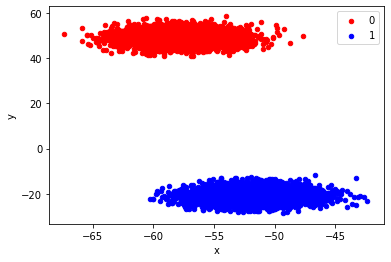

In [10]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

num_classes = 2
num_features = 8


X, y = make_blobs(n_samples=10000, centers=num_classes, n_features=num_features, cluster_std=0.25, shuffle=True)
X*=10
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()
    
Y = np.zeros(shape = (len(y), num_classes))
for ind, label in enumerate(y):
    Y[ind][label] = 1.0

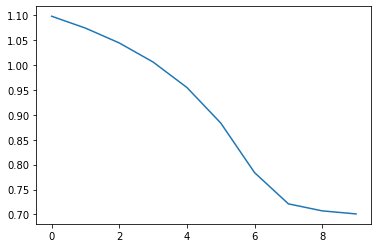

train accuracy 1.0


In [11]:
#X = (X-X.min())/(X.max()-X.min())

layers = [
    Dense(num_features, 4,tanh, tanh_grad),
    Dense(4,2, tanh, tanh_grad),
    Dense(2, num_classes, softmax, softmax_grad)]

epochs = 10
alpha = 1.0e-4
iteration_loss = []
epoch_loss = []
DEBUG=False
for i  in range(epochs):
    #alpha *=1/10
    for j, sample in enumerate(X):
        intermediate = sample
        for layer in layers:
            intermediate = layer.prop_fwd(intermediate)
        Y_hat = 1 - intermediate #TODO: figure why i need to do this
        iteration_loss.append(binary_crossentropy_loss(Y_hat, Y[j]))
        
        dA = binary_crossentropy_loss_grad(Y_hat, Y[j])
        layers.reverse()
        updW = []
        updB = []
        for k, layer in enumerate(layers):
            dZ = layer.prop_bwd(dA, layer.Z)
            dW = np.array([np.array([np.sum(layer.A)*z]) for z in dZ])/layer.A.shape[0]
            db = np.sum(dZ, axis=0, keepdims=True)/layer.A.shape[0]
            dA = np.dot(layer.W.T, dZ)
            updW.append(dW*alpha)
            updB.append(db*alpha)
        
        for k, W in enumerate(updW):
            layers[k].W -= W
            layers[k].b -= updB[k]
            
        layers.reverse()
    epoch_loss.append(np.array(iteration_loss).mean())
        
        
correct = 0
epoch_loss.reverse()#TODO: fix loss reversa
pyplot.plot(epoch_loss) 
pyplot.show()
for j, x in enumerate(X):
    Y_hat = x
    for layer in layers:
        Y_hat = layer.prop_fwd(Y_hat)
    if (np.around(Y_hat, decimals=0) == Y[j]).all():
        correct+=1
print('train accuracy', correct/len(y))

In [ ]:
for j, x in enumerate(X):
    Y_hat = x
    for layer in layers:
        Y_hat = layer.prop_fwd(Y_hat)
        #print(Y_hat)
    
    DEBUG=True
    debug_print('NN:', np.around(Y_hat, decimals=5), 'LABEL:',Y[j])
    DEBUG=False
    if (np.around(Y_hat, decimals=0) == Y[j]).all():
        correct+=1

 NN:  [0.73128 0.26872]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73125 0.26875]  LABEL:  [1. 0.] 
 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.73128 0.26872]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73124 0.26876]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [

 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26929 0.73071]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26918 0.73082]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26926 0.73074]  LABEL:  [

 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73128 0.26872]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26926 0.73074]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.73121 0.26879]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [

 NN:  [0.73125 0.26875]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.73125 0.26875]  LABEL:  [1. 0.] 
 NN:  [0.73124 0.26876]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73125 0.26875]  LABEL:  [1. 0.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.73128 0.26872]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [

 NN:  [0.73128 0.26872]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73122 0.26878]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26917 0.73083]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73128 0.26872]  LABEL:  [1. 0.] 
 NN:  [0.26919 0.73081]  LABEL:  [0. 1.] 
 NN:  [0.73125 0.26875]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [

 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73128 0.26872]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.73124 0.26876]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26917 0.73083]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26917 0.73083]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26917 0.73083]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26921 0.73079]  LABEL:  [

 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73128 0.26872]  LABEL:  [1. 0.] 
 NN:  [0.26917 0.73083]  LABEL:  [0. 1.] 
 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73124 0.26876]  LABEL:  [1. 0.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [

 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.26917 0.73083]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.2692 0.7308]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.73128 0.26872]  LABEL:  [1. 0.] 
 NN:  [0.26917 0.73083]  LABEL:  [0. 1.] 
 NN:  [0.73125 0.26875]  LABEL:  [1. 0.] 
 NN:  [0.73123 0.26877]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.73123 0.26877]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73119 0.26881]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0.

 NN:  [0.73125 0.26875]  LABEL:  [1. 0.] 
 NN:  [0.26918 0.73082]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.2692 0.7308]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73125 0.26875]  LABEL:  [1. 0.] 
 NN:  [0.73125 0.26875]  LABEL:  [1. 0.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26925 0.73075]  LABEL:  [0. 1.] 
 NN:  [0.73128 0.26872]  LABEL:  [1. 0.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.73128 0.26872]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1.

 NN:  [0.26919 0.73081]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.2693 0.7307]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.73125 0.26875]  LABEL:  [1. 0.] 
 NN:  [0.26917 0.73083]  LABEL:  [0. 1.] 
 NN:  [0.73128 0.26872]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73128 0.26872]  LABEL:  [1. 0.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1.

 NN:  [0.26917 0.73083]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.73125 0.26875]  LABEL:  [1. 0.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73125 0.26875]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26917 0.73083]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26923 0.73077]  LABEL:  [0. 1.] 
 NN:  [0.73128 0.26872]  LABEL:  [

 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26928 0.73072]  LABEL:  [0. 1.] 
 NN:  [0.73124 0.26876]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73128 0.26872]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.7312 0.2688]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0.

 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.73124 0.26876]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73128 0.26872]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73124 0.26876]  LABEL:  [

 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.2692 0.7308]  LABEL:  [0. 1.] 
 NN:  [0.73125 0.26875]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73125 0.26875]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73125 0.26875]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26921 0.73079]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1.

 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73125 0.26875]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26924 0.73076]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26918 0.73082]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26917 0.73083]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [

 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73128 0.26872]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26926 0.73074]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26921 0.73079]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.26919 0.73081]  LABEL:  [0. 1.] 
 NN:  [0.26922 0.73078]  LABEL:  [0. 1.] 
 NN:  [0.73125 0.26875]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26917 0.73083]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [

 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.73128 0.26872]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26917 0.73083]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73125 0.26875]  LABEL:  [1. 0.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.73128 0.26872]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73125 0.26875]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.7312 0.2688]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1.

 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26917 0.73083]  LABEL:  [0. 1.] 
 NN:  [0.73122 0.26878]  LABEL:  [1. 0.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26925 0.73075]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.73117 0.26883]  LABEL:  [1. 0.] 
 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73128 0.26872]  LABEL:  [1. 0.] 
 NN:  [0.73125 0.26875]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73125 0.26875]  LABEL:  [1. 0.] 
 NN:  [0.2692 0.7308]  LABEL:  [0. 1.] 
 NN:  [0.73124 0.26876]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1.

 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26923 0.73077]  LABEL:  [0. 1.] 
 NN:  [0.73122 0.26878]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73124 0.26876]  LABEL:  [

 NN:  [0.73125 0.26875]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.73124 0.26876]  LABEL:  [1. 0.] 
 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [

 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.2692 0.7308]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26919 0.73081]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.73128 0.26872]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.73126 0.26874]  LABEL:  [1. 0.] 
 NN:  [0.73127 0.26873]  LABEL:  [1. 0.] 
 NN:  [0.26912 0.73088]  LABEL:  [0. 1.] 
 NN:  [0.26918 0.73082]  LABEL:  [0. 1.] 
 NN:  [0.26913 0.73087]  LABEL:  [0. 1.] 
 NN:  [0.26916 0.73084]  LABEL:  [0. 1.] 
 NN:  [0.26914 0.73086]  LABEL:  [0. 1.] 
 NN:  [0.26915 0.73085]  LABEL:  [0. 1.] 
 NN:  [0.26919 0.73081]  LABEL:  [0.